In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy.stats as stats
from sklearn.cluster import KMeans

In [2]:
class kmeans_clust(object):

    
    """
    A paranet class to generate a raw data from two normal distributions.
    Then k-means clustering algotighm is to be applied for both distributions.
    
    ...

    Attributes
    ----------
    x1/2, y1/2 : float
        mean value of the normal distributions
    n : float
        number of data points for each distribution
    nk : int
        number of k-means clusters

    Methods
    -------
    plot_xy():
        Plots the raw data generated.
    """
    
    
    __slots__ = ['x','y','num','numk',
                 'data_x1','data_x2','data_y1','data_y2','data_kmeans']
    
    
    def __init__(self, x1, x2, y1, y2, n, nk):
        self.x = (x1, x2)
        self.y = (y1, y2)
        self.num = int(n)
        self.numk = int(nk)
        
        self.data_x1 = np.random.normal(self.x[0], 1, self.num)
        self.data_y1 = np.random.normal(self.x[1], 1, self.num) 
        self.data_x2 = np.random.normal(self.y[0], 1, self.num)
        self.data_y2 = np.random.normal(self.y[1], 1, self.num)
        self.data_kmeans = np.array(
                                   ([np.hstack((self.data_x1,self.data_x2)),
                                     np.hstack((self.data_y1,self.data_y2))])).T
        
    
    def plots(plot_details):
        def create_figure(*args, **kwargs):
            plt.figure()
            plot_details(*args, **kwargs)
            plt.xlabel('x', size = 15)
            plt.ylabel('y', size = 15)
            plt.show()
        return create_figure
    
    @plots
    def plot_xy(self): 
        clusters = ['Cluster1','Cluster2']
        plt.scatter(self.data_x1, self.data_y1)
        plt.scatter(self.data_x2, self.data_y2)
        plt.legend(clusters)
        plt.title('Random data',size = 15)

        
class kmeans_rnd(kmeans_clust): 
    
    
    """
    A child class to apply k-means clustering with random initialization
    of the clusters' centroids. Inherits the parent class’s methods and attributes.
    
    ...

    Attributes
    ----------
    x1/2, y1/2 : float
        mean value of the normal distributions
    n : float
        number of data points for each distribution
    nk : int
        number of k-means clusters

    Methods
    -------
    plot_kmeans_rnd():
        Plots the two clusters with randomly assigned centroids in each distribution.
    """
    
    
    __slots__ = ['centroids_rnd', 'data_kmeans']
        
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        init_rnd = np.random.choice(np.arange(self.data_kmeans.shape[0]), size = self.numk, replace=False)
        self.centroids_rnd = self.data_kmeans[init_rnd, :]
    
    @kmeans_clust.plots
    def plot_kmeans_rnd(self):    
        plt.scatter(self.data_kmeans[:,0], self.data_kmeans[:,1])
        plt.scatter(self.centroids_rnd[:,0].reshape(-1), self.centroids_rnd[:,1].reshape(-1), color = 'k', marker='o', linewidths = 5)
        plt.title('Assigned cluster centroids',size = 15)
     
    
class kmeans_builtin(kmeans_clust):
    
    """
    A child class to apply k-means clustering with the built-in Python libraries.
    Inherits the parent class’s methods and attributes.
    
    ...

    Attributes
    ----------
    x1/2, y1/2 : float
        mean value of the normal distributions
    n : float
        number of data points for each distribution
    nk : int
        number of k-means clusters

    Methods
    -------
    plot_kmeans_builtin():
        Plots the two clusters with their correspoding centroids in each distribution.
    """
    
    
    __slots__ = ['kmeans_py', 'centroids_py']
    
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.kmeans_py = KMeans(n_clusters = 2).fit(self.data_kmeans)
        self.centroids_py = self.kmeans_py.cluster_centers_
    
    @kmeans_clust.plots
    def plot_kmeans_builtin(self):
        plt.scatter(self.data_kmeans[:,0], self.data_kmeans[:,1], c = self.kmeans_py.labels_)
        plt.scatter(self.centroids_py[:,0], self.centroids_py[:,1], color = 'k', marker = 'o', linewidths = 5)
        plt.title('Built-in K-means cluster centroids',size = 15)
    

In [3]:
k = kmeans_clust(x1 = 2, x2 = 2, y1 = -5, y2 = 5, n = 10000, nk = 2)

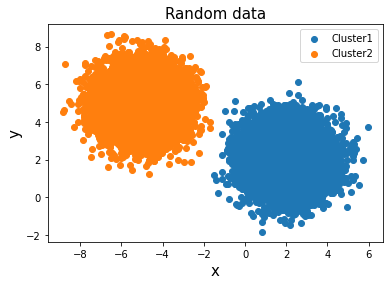

In [4]:
k.plot_xy()

In [5]:
krnd = kmeans_rnd(x1 = 2, x2 = 2, y1 = -5, y2 = 5, n = 10000, nk = 2)

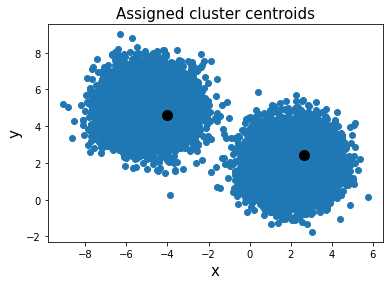

In [6]:
krnd.plot_kmeans_rnd()

In [7]:
kpy = kmeans_builtin(x1 = 2, x2 = 2, y1 = -5, y2 = 5, n = 10000, nk = 2)

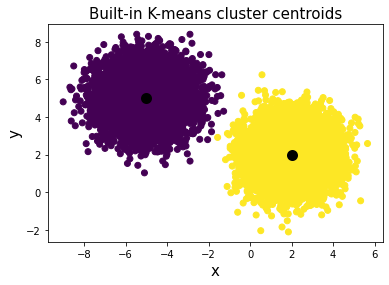

In [8]:
kpy.plot_kmeans_builtin()